In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


# Read csv file and initialze the dataframe.
initial_data=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv',index_col='Name')
temp_data = initial_data[['Year_of_Release','Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Rating']]

# Handle the missing data in Rating column: replace N/A rating with 'Others'.
temp_data['Rating'] = temp_data['Rating'].fillna('Others')

# Handle missing data: Drop any rows in cleaned_data that contains at least one N/A value.
cleaned_data=temp_data.dropna(how='any')

# The column of 'Year_of_Release' in cleaned_data is float data type. An eligible data type should be integer. 
# Convert the float numbers in the column to integers.
cleaned_data['Year_of_Release'] = cleaned_data.Year_of_Release.apply(lambda num: int(num))

# Sort cleaned_data by 'Global_Sales' in descending order.
cleaned_data.sort_values(by=['Global_Sales'], inplace=True, ascending=False)

# If ('Summed_regional_sales' / 'Global_Sales') is arbitrarily large or arbitrarily small, I'll consider it as an outlier.
cleaned_data['Summed_regional_sales'] = cleaned_data['NA_Sales'] + cleaned_data['EU_Sales'] + cleaned_data['JP_Sales'] + cleaned_data['Other_Sales']
cleaned_data['Ratio_in_Sales'] = cleaned_data['Summed_regional_sales'] / cleaned_data['Global_Sales']




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_

In [2]:
def interquartile_range(series):
    return series.quantile(0.75)-series.quantile(0.25)

def mode(series):
    return stats.mode(series)[0]

def data_range(series):
    return series.max()-series.min()


group_by_publisher = cleaned_data.groupby('Publisher')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean', 'median','std','var',data_range,mode, stats.skew])
group_by_platform = cleaned_data.groupby('Platform')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean', 'median','std','var',data_range,mode, stats.skew])
group_by_genre = cleaned_data.groupby('Genre')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean', 'median','std','var',data_range,mode, stats.skew])
group_by_rating = cleaned_data.groupby('Rating')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean', 'median','std','var',data_range,mode, interquartile_range,stats.skew])

group_by_publisher.sort_values(by=[('Global_Sales','mean')], inplace=True, ascending=False)
print(group_by_publisher)

                                   Global_Sales                              \
                                           mean median       std        var   
Publisher                                                                     
Palcom                                 4.170000  4.170       NaN        NaN   
Red Orb                                2.620000  2.620  0.268701   0.072200   
Nintendo                               2.552457  0.900  5.648595  31.906621   
Arena Entertainment                    2.360000  2.360  0.438406   0.192200   
UEP Systems                            2.250000  2.250       NaN        NaN   
RedOctane                              2.170000  1.745  2.181758   4.760067   
Hello Games                            1.700000  1.700       NaN        NaN   
Valve                                  1.700000  1.700       NaN        NaN   
Sony Computer Entertainment Europe     1.558000  0.800  1.707003   2.913860   
Westwood Studios                       1.550000  1.5

In [3]:
group_by_genre.sort_values(by=[('Global_Sales','mean')], inplace=True, ascending=False)
print(group_by_genre)


             Global_Sales                                              \
                     mean median       std       var data_range  mode   
Genre                                                                   
Platform         0.940615  0.275  2.587494  6.695123      40.23  0.03   
Shooter          0.803881  0.235  1.831543  3.354549      28.30  0.02   
Role-Playing     0.627714  0.190  1.718215  2.952262      31.36  0.02   
Racing           0.590767  0.190  1.671465  2.793796      35.51  0.02   
Sports           0.568252  0.220  2.099598  4.408311      82.52  0.02   
Fighting         0.528829  0.210  0.954169  0.910439      12.83  0.06   
Action           0.519389  0.190  1.153706  1.331037      21.03  0.02   
Misc             0.461514  0.150  1.321628  1.746700      28.91  0.02   
Simulation       0.454058  0.160  1.198060  1.435347      24.66  0.02   
Puzzle           0.422373  0.100  1.577094  2.487227      30.25  0.02   
Strategy         0.256979  0.090  0.522677  0.27319

In [4]:
group_by_platform.sort_values(by=[('Global_Sales','mean')], inplace=True, ascending=False)
print(group_by_platform)

         Global_Sales                                               \
                 mean median       std        var data_range  mode   
Platform                                                             
GB           2.622887  1.180  5.390733  29.060002      31.31  0.07   
NES          2.561939  1.375  5.108195  26.093659      40.18  1.10   
GEN          1.050370  0.150  1.492217   2.226711       6.00  0.07   
SNES         0.837029  0.320  1.869059   3.493381      20.60  0.05   
PS4          0.799567  0.200  1.607147   2.582922      14.62  0.02   
X360         0.780349  0.280  1.631825   2.662853      21.80  0.02   
2600         0.746293  0.475  0.955571   0.913116       7.74  0.34   
PS3          0.712979  0.280  1.402879   1.968071      21.03  0.02   
Wii          0.693421  0.190  3.164786  10.015870      82.52  0.02   
N64          0.690538  0.270  1.321415   1.746138      11.88  0.06   
XOne         0.645506  0.220  1.035973   1.073240       7.38  0.01   
PS           0.61126

In [5]:
group_by_rating.sort_values(by=[('Global_Sales','mean')], inplace=True, ascending=False)
print(group_by_rating)

       Global_Sales                                              \
               mean median       std       var data_range  mode   
Rating                                                            
AO         1.950000  1.950       NaN       NaN       0.00  1.95   
K-A        1.443333  1.920  1.264292  1.598433       2.39  0.01   
M          0.952214  0.305  1.941743  3.770368      21.03  0.02   
E          0.614341  0.200  2.144974  4.600914      82.52  0.02   
T          0.507565  0.200  0.914709  0.836692      12.83  0.02   
E10+       0.460302  0.200  0.797980  0.636772      10.11  0.02   
Others     0.423509  0.110  1.366269  1.866690      40.23  0.02   
EC         0.222500  0.220  0.147333  0.021707       0.40  0.05   
RP         0.030000  0.030       NaN       NaN       0.00  0.03   

                                       NA_Sales           ...      \
       interquartile_range       skew      mean median    ...       
Rating                                                   

In [6]:
######## DATA VISUALIZATION

# Global sales, Number of users to rate, and users' rating for each game
Users_feedback_table_raw = initial_data[['Global_Sales','User_Count','User_Score']]
Users_feedback_table = Users_feedback_table_raw.dropna(how='any')

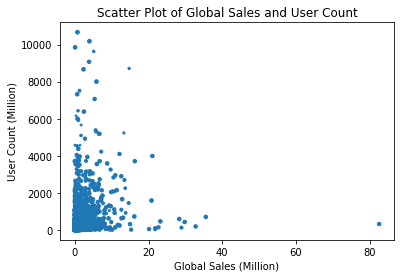

In [7]:
# Scatter plot
np_score=np.array(Users_feedback_table['User_Score'])
np_score = np_score.astype(np.float)
np_score = np_score * 1.5

plt.scatter(Users_feedback_table['Global_Sales'],Users_feedback_table['User_Count'],s=np_score)
plt.title('Scatter Plot of Global Sales and User Count')
plt.xlabel('Global Sales (Million)')
plt.ylabel('User Count (Million)')
file_name='scatterplot1.png'
plt.savefig(file_name)
plt.show()

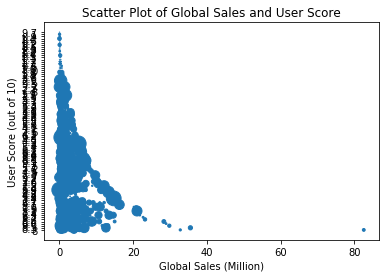

In [8]:
# Scatter plot
size=np.array(Users_feedback_table['User_Count'])
size = size.astype(np.float)
size = size / 40
plt.scatter(Users_feedback_table['Global_Sales'],Users_feedback_table['User_Score'],s=size)
plt.title('Scatter Plot of Global Sales and User Score')
plt.xlabel('Global Sales (Million)')
plt.ylabel('User Score (out of 10)')
file_name='scatterplot2.png'
plt.savefig(file_name)
plt.show()

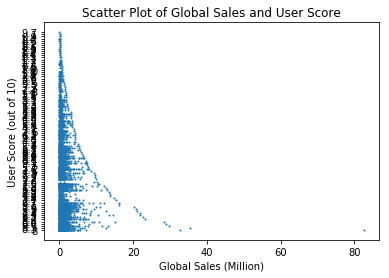

In [9]:
plt.scatter(Users_feedback_table['Global_Sales'],Users_feedback_table['User_Score'],s=1)
plt.title('Scatter Plot of Global Sales and User Score')
plt.xlabel('Global Sales (Million)')
plt.ylabel('User Score (out of 10)')
file_name='scatterplot2-without_size.png'
plt.savefig(file_name)
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "Best". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


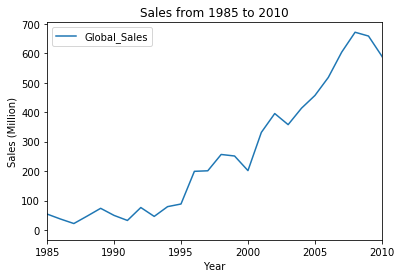

In [10]:
global_sale_by_year = cleaned_data.groupby('Year_of_Release')[['Global_Sales']].sum()
years = global_sale_by_year.index.tolist()
plt.plot(years,global_sale_by_year['Global_Sales'])
ax=plt.gca()
ax.set_xlim([1985,2010])
plt.legend(loc='Best')
plt.title('Sales from 1985 to 2010')
plt.xlabel('Year')
plt.ylabel('Sales (Million)')
file_name='line_graph_sales.png'
plt.savefig(file_name)
plt.show()

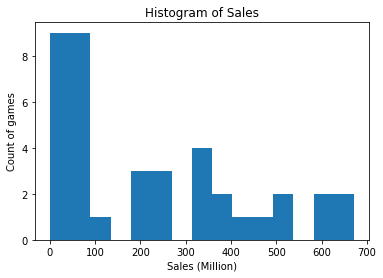

In [11]:
plt.hist(global_sale_by_year['Global_Sales'],bins=15)
plt.title('Histogram of Sales')
plt.xlabel('Sales (Million)')
plt.ylabel('Count of games')
file_name='histogram.png'
plt.savefig(file_name)
plt.show()

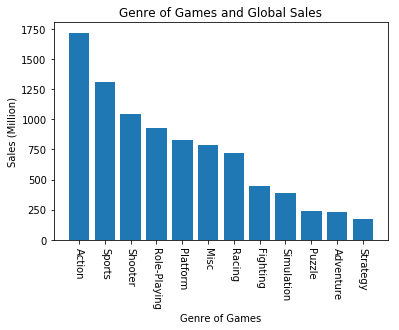

In [12]:
sales_by_genre = cleaned_data.groupby('Genre')[['Global_Sales']].sum()
sales_by_genre.sort_values(by=['Global_Sales'], inplace=True, ascending=False)
genres = sales_by_genre.index.tolist()
plt.bar(genres,sales_by_genre['Global_Sales'])
plt.title('Genre of Games and Global Sales')
plt.xlabel('Genre of Games')
plt.ylabel('Sales (Million)')
plt.xticks(rotation=270)
file_name='genre_vs_sales_bar.png'
plt.savefig(file_name)
plt.show()


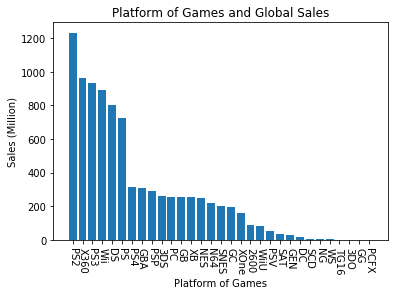

In [13]:
sales_by_platform = cleaned_data.groupby('Platform')[['Global_Sales']].sum()
sales_by_platform.sort_values(by=['Global_Sales'], inplace=True, ascending=False)
platform = sales_by_platform.index.tolist()
plt.bar(platform,sales_by_platform['Global_Sales'])
plt.title('Platform of Games and Global Sales')
plt.xlabel('Platform of Games')
plt.ylabel('Sales (Million)')
plt.xticks(rotation=270)
file_name='platform_vs_sales_bar.png'
plt.savefig(file_name)
plt.show()

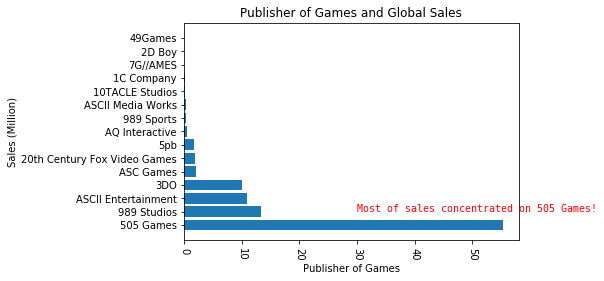

In [14]:
sales_by_publisher = cleaned_data.groupby('Publisher')[['Global_Sales']].sum().head(15)
sales_by_publisher.sort_values(by=['Global_Sales'], inplace=True, ascending=False)
publisher = sales_by_publisher.index.tolist()
plt.barh(publisher,sales_by_publisher['Global_Sales'])
plt.title('Publisher of Games and Global Sales')
plt.xlabel('Publisher of Games')
plt.ylabel('Sales (Million)')
plt.text(30, 1, 'Most of sales concentrated on 505 Games!', family='monospace', fontsize=10, color = 'Red')
plt.xticks(rotation=270)
file_name='publisher_vs_sales_bar.png'
plt.savefig(file_name)
plt.show()

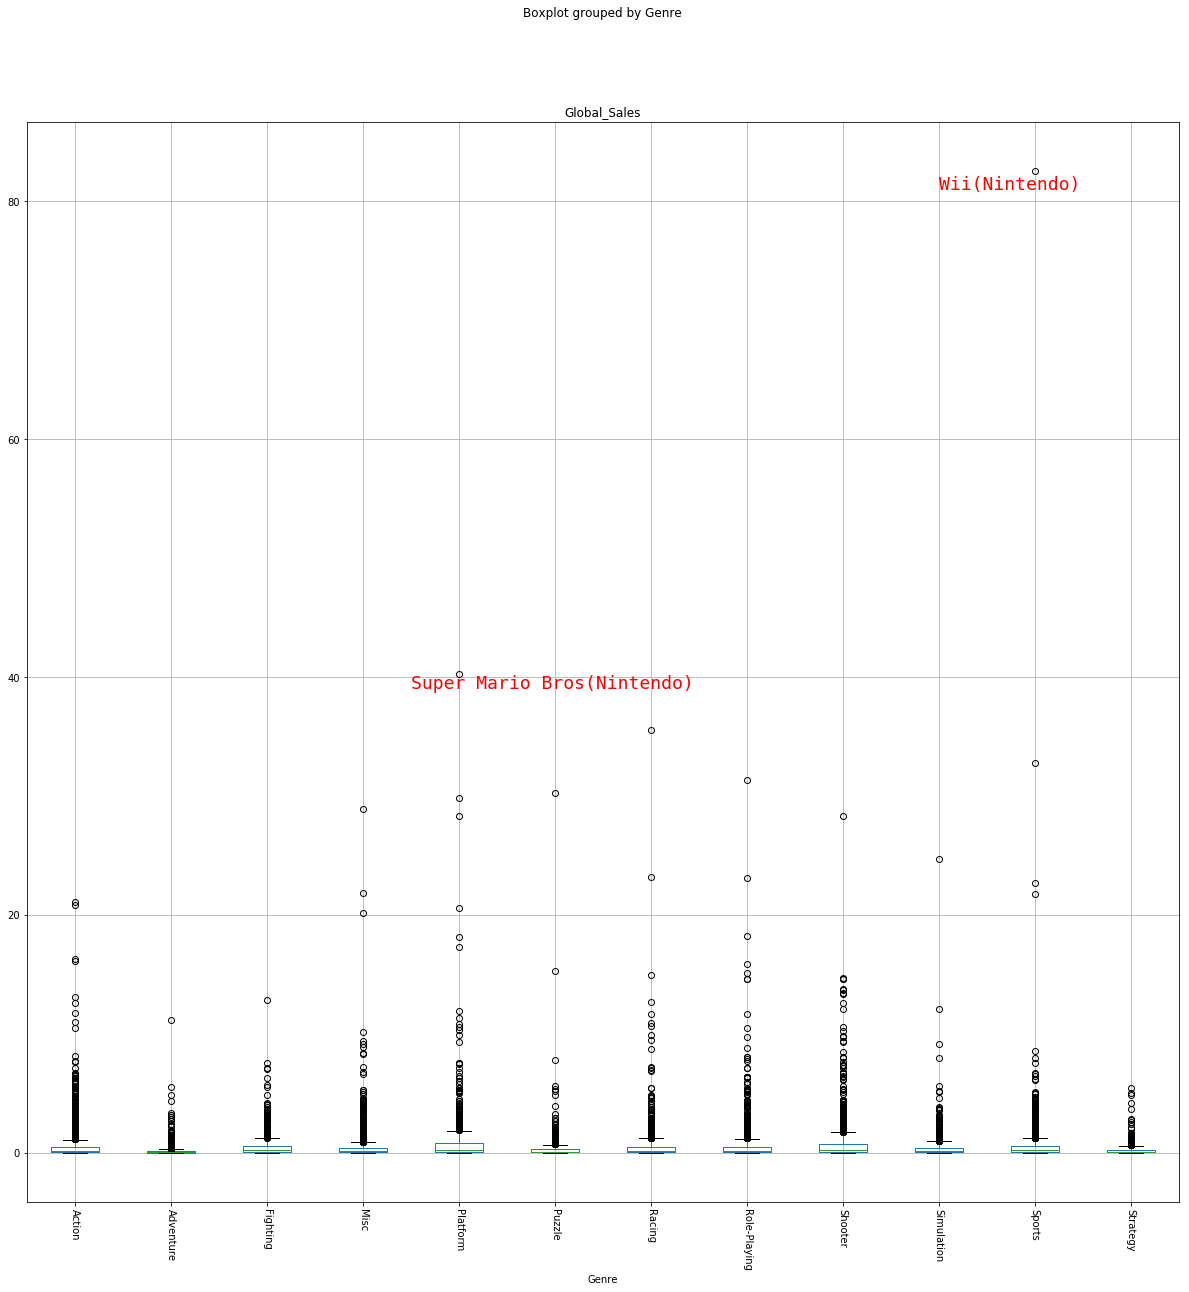

In [15]:
# Box plots    
box_plots = cleaned_data.boxplot(column="Global_Sales", by="Genre",rot=270, figsize=(20,20))
plt.text(10, 81, 'Wii(Nintendo)', family='monospace', fontsize=18, color = 'Red')
plt.text(4.5, 39, 'Super Mario Bros(Nintendo)', family='monospace', fontsize=18, color = 'Red')
file_name='genre_vs_sales_boxgraph.png'
plt.savefig(file_name)
plt.show()

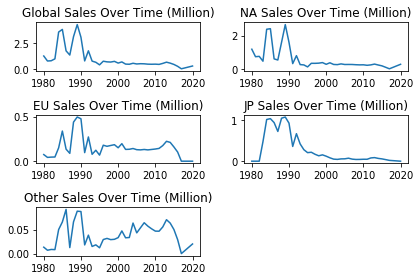

In [16]:
platform_mean_sale_overtime = cleaned_data.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean'])
years = platform_mean_sale_overtime.index.tolist()

plt.subplot(3,2,1)
plt.plot(years,platform_mean_sale_overtime['Global_Sales'])
plt.title('Global Sales Over Time (Million)')

plt.subplot(3,2,2)
plt.plot(years,platform_mean_sale_overtime['NA_Sales'])
plt.title('NA Sales Over Time (Million)')

plt.subplot(3,2,3)
plt.plot(years,platform_mean_sale_overtime['EU_Sales'])
plt.title('EU Sales Over Time (Million)')

plt.subplot(3,2,4)
plt.plot(years,platform_mean_sale_overtime['JP_Sales'])
plt.title('JP Sales Over Time (Million)')

plt.subplot(3,2,5)
plt.plot(years,platform_mean_sale_overtime['Other_Sales'])
plt.title('Other Sales Over Time (Million)')
plt.tight_layout()
file_name='subplots.png'
plt.savefig(file_name)
plt.show()

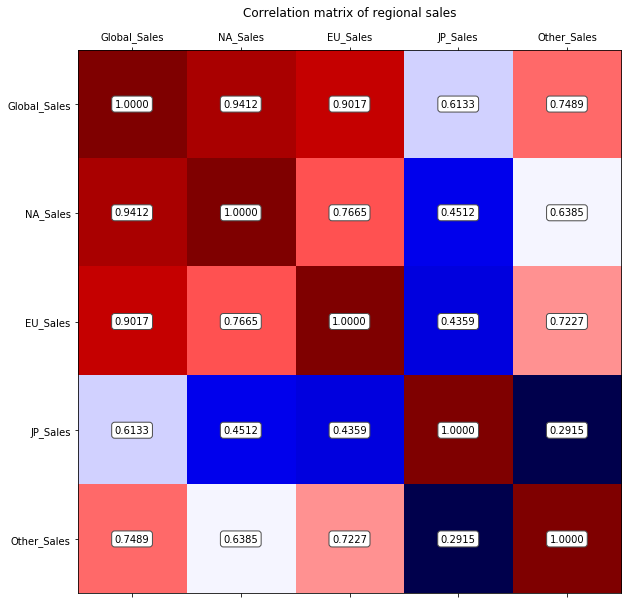

In [17]:
# Correlation matrix
regional_sales = cleaned_data[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
corr = regional_sales.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

fig, ax = plt.subplots(figsize=(10, 10))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(corr, cmap='seismic')

for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.4f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Correlation matrix of regional sales')
plt.xticks(range(0,5),['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks(range(0,5),['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
file_name='correlation matrix.png'
plt.savefig(file_name)
plt.show()

In [18]:
##################   MACHINE LEARNING APPLICATIONS

temp_data = initial_data[['Platform','Genre','Global_Sales','Rating']]

# Handle missing data: Drop any rows in cleaned_data that contains at least one N/A value.
cleaned_data=temp_data.dropna(how='any')

# The column of 'Year_of_Release' in cleaned_data is float data type. An eligible data type should be integer. 
# Convert the float numbers in the column to integers.

# info
print(cleaned_data.info())

# shape
print(cleaned_data.shape)

# head 
print(cleaned_data.head(10))

# descriptions
print(cleaned_data.describe())

# Sales to define if it's popular
sales_threshold = 0.47

def transform(n):
    if float(n) < sales_threshold:
        return 0
    return 1

<class 'pandas.core.frame.DataFrame'>
Index: 9950 entries, Wii Sports to Men in Black II: Alien Escape
Data columns (total 4 columns):
Platform        9950 non-null object
Genre           9950 non-null object
Global_Sales    9950 non-null float64
Rating          9950 non-null object
dtypes: float64(1), object(3)
memory usage: 388.7+ KB
None
(9950, 4)
                          Platform     Genre  Global_Sales Rating
Name                                                             
Wii Sports                     Wii    Sports         82.53      E
Mario Kart Wii                 Wii    Racing         35.52      E
Wii Sports Resort              Wii    Sports         32.77      E
New Super Mario Bros.           DS  Platform         29.80      E
Wii Play                       Wii      Misc         28.92      E
New Super Mario Bros. Wii      Wii  Platform         28.32      E
Mario Kart DS                   DS    Racing         23.21      E
Wii Fit                        Wii    Sports         

In [19]:
# Transform categrorical values into numerical values. DELETE UNECESSARY ONES 
cleaned_data['Global_Sales'] = cleaned_data['Global_Sales'].apply(transform)
cleaned_data['Platform'] = cleaned_data['Platform'].map({'Wii':0, 'NES':1, 'GB':2, 'DS':3, 'X360':4, 'PS3':5, 'PS2':6, 'SNES':7,'GBA':8,'PS4':9,'3DS':10,'N64':11, 'PS':12,'XB':13,'PC':14,'2600':15,'PSP'  :16 ,'XOne' : 17, 'WiiU' : 18, 'GC' : 19, 'GEN' : 20 , 'DC' : 21, 'PSV' : 22, 'SAT' : 23, 'SCD' : 24, 'WS' : 25, 'NG': 26, 'TG16' : 27, '3DO':28,'GG':29, 'PCFX':30})
cleaned_data['Genre'] = cleaned_data['Genre'].map({'Action':0,'Sports':1,'Shooter':2,'Role-Playing':3,'Platform':4,'Misc':5,'Racing':6,'Fighting':7,'Simulation':8,'Puzzle':9,'Adventure':10,'Strategy':11})
cleaned_data['Rating'] = cleaned_data['Rating'].map({'E':0,'E10+':1,'EC':2,'K-A':3,'M':4,'RP':5,'T':6,'AO':7,'':8})


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [20]:
# Target variable 
target_variable_sale = cleaned_data['Global_Sales']

cleaned_data.drop(["Global_Sales"], axis=1, inplace=True)

predictors = cleaned_data

test_size = 0.30
seed = 7

# select 30% randomly and split
X_train, X_test, Y_train, Y_test= train_test_split(predictors,target_variable_sale, test_size=test_size, random_state=seed)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
# Prepare for Algorithms comparison
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [22]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
# define how to split off validation data, tune k, hyperparameter
    kfold= KFold(n_splits=10, random_state=seed)
# train the model
    cv_results= cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg= "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.7017960800804763 (0.014392976226575776)
LDA: 0.7017960800804763 (0.014392976226575776)
KNN: 0.669634847210541 (0.014793642310781749)
CART: 0.7012226042645823 (0.017197495392395405)
NB: 0.7017960800804763 (0.014392976226575776)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

SVM: 0.709549959596959 (0.017421957630247686)


In [23]:
# Compare Algorithms
print("This is the results for classification algo:")
print()

for i in range(len(results)):
    print("- The accuracy results for model " + names[i] + " in 10-folds: ")
    print(results[i])
    print()

This is the results for classification algo:

- The accuracy results for model LR in 10-folds: 
[0.70301291 0.69583931 0.70444763 0.68866571 0.70731707 0.70977011
 0.69971264 0.7341954  0.67528736 0.69971264]

- The accuracy results for model LDA in 10-folds: 
[0.70301291 0.69583931 0.70444763 0.68866571 0.70731707 0.70977011
 0.69971264 0.7341954  0.67528736 0.69971264]

- The accuracy results for model KNN in 10-folds: 
[0.69153515 0.67001435 0.65853659 0.64992826 0.67144907 0.66954023
 0.65373563 0.69827586 0.65948276 0.67385057]

- The accuracy results for model CART in 10-folds: 
[0.72166428 0.70301291 0.70014347 0.67862267 0.68723099 0.72270115
 0.69252874 0.73132184 0.68534483 0.68965517]

- The accuracy results for model NB in 10-folds: 
[0.70301291 0.69583931 0.70444763 0.68866571 0.70731707 0.70977011
 0.69971264 0.7341954  0.67528736 0.69971264]

- The accuracy results for model SVM in 10-folds: 
[0.72022956 0.71018651 0.71449067 0.68149211 0.70588235 0.7341954
 0.69971264 0

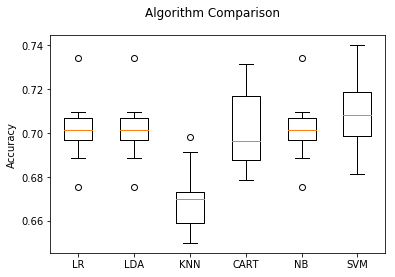

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()


In [25]:
print()
print('The classification model we chose is: SVM Model.')
print()


The classification model we chose is: SVM Model.



In [26]:
# Make predictions on test dataset
# instantiate learning model
classifier = SVC()
              
# fitting the model
classifier.fit(X_train, Y_train)
              
# predict the response
predictions = classifier.predict(X_test)
predictions_sum=predictions.sum()
print('this is the prediction result:')
print(predictions_sum)
              
# evaluate accuracy
print("This is accuracy scores for the predictions from SVM model we chose for classification:")
print(accuracy_score(Y_test, predictions))
print()

print("This is confusion matrix for the predictions from SVM model we chose for classification:")
print(confusion_matrix(Y_test, predictions))
print()

print("This is classification report for the predictions from SVM model we chose for classification:")
print(classification_report(Y_test, predictions))
print()

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


this is the prediction result:
316
This is accuracy scores for the predictions from SVM model we chose for classification:
0.7112227805695143

This is confusion matrix for the predictions from SVM model we chose for classification:
[[1959  152]
 [ 710  164]]

This is classification report for the predictions from SVM model we chose for classification:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      2111
           1       0.52      0.19      0.28       874

    accuracy                           0.71      2985
   macro avg       0.63      0.56      0.55      2985
weighted avg       0.67      0.71      0.66      2985




In [27]:
# Regression
reg_data = initial_data[['Global_Sales','User_Score','Critic_Score']]

# Clean data
reg_data=reg_data.dropna(how='any')
reg_data=reg_data[reg_data['User_Score'] != 'tbd']

# Convert Object type "User_Score" to float type.
reg_data["User_Score"] = reg_data["User_Score"].astype(np.float)

Y = reg_data['Global_Sales']
reg_data.drop(["Global_Sales"], axis=1, inplace=True)
X = reg_data

scoring = 'neg_mean_squared_error'
num_folds= 10
test_size = 0.3
seed = 13

# select 30% data for test set
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

# Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Prepare the data: standardize the data
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [28]:
# Model evaluation
results = []
names = []
for name, model in pipelines:
    # define how to split off validation data
    kfold= KFold(n_splits=num_folds, random_state=seed)
    # train the model
    cv_results= cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -3.9013442075910825 (4.165950839585852)
ScaledLASSO: -4.119339573233257 (4.196541545983265)
ScaledRIDGE: -3.901342632997519 (4.165958219785109)
ScaledEN: -4.119339573233257 (4.196541545983265)
ScaledKNN: -4.602539828519861 (3.902696392058401)
ScaledCART: -4.855791988172301 (4.034115458911209)
ScaledSVR: -3.9456455030173467 (4.217014351755108)


This is regression algo's results:

- The neg-MSE results for model ScaledLR in 10-folds: 
[ -1.23195839  -3.87024963 -16.11393201  -3.67615761  -3.01650302
  -1.94425177  -2.09975272  -3.55934789  -1.75081644  -1.75047258]

- The neg-MSE results for model ScaledLASSO in 10-folds: 
[ -1.43456738  -3.99710886 -16.42570733  -3.85644571  -3.33796069
  -2.223576    -2.31284938  -3.79247056  -1.87858827  -1.93412155]

- The neg-MSE results for model ScaledRIDGE in 10-folds: 
[ -1.2319511   -3.87020508 -16.11395367  -3.67612093  -3.01658768
  -1.94427182  -2.09976096  -3.55935332  -1.75076443  -1.75045732]

- The neg-MSE results for model ScaledEN in 10-folds: 
[ -1.43456738  -3.99710886 -16.42570733  -3.85644571  -3.33796069
  -2.223576    -2.31284938  -3.79247056  -1.87858827  -1.93412155]

- The neg-MSE results for model ScaledKNN in 10-folds: 
[ -1.48718997  -4.14941953 -16.0279559   -3.954458    -4.62352733
  -2.93000282  -3.26545817  -3.84666294  -3.24565296  -2.49507066]

- The neg-MS

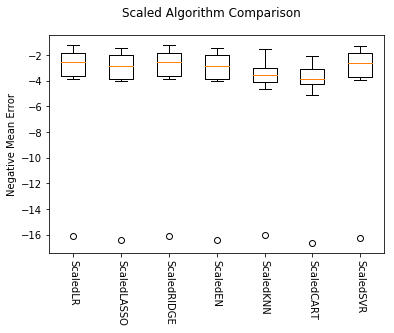

In [29]:
# Compare Algorithms
print("This is regression algo's results:")
print()
for i in range(len(results)):
    print("- The neg-MSE results for model " + names[i] + " in 10-folds: ")
    print(results[i])
    print()

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Negative Mean Error')
ax.set_xticklabels(names, rotation = 270)

print('The regression model we choose to predict global sales of a game is: SVR.')
print()

In [30]:
# Compute mean and stddev to be used for later scaling
scaler = StandardScaler().fit(X_train)

# Perform standardization by centering and scaling
rescaledX= scaler.transform(X_train)

# set up kfoldfor cross validation
kfold= KFold(n_splits=num_folds, random_state=seed)

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
model = SVR()
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring, cv=kfold, return_train_score=True)

# fit training data and get results
######################## COMMENT OUT THE HYPERPARAMETER TUNING 
######################## Long running time IN CASE OF DEBUG: grid_result= grid.fit(rescaledX, Y_train)

In [31]:
# best result
#### print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)

# calculate estimates for test dataset
# instantiate learning model: kernel='linear',gamma=1e-07,epsilon=0.5,C=10 is the optimal combo from hyperparameter tunning
model = SVR(kernel='linear',gamma=1e-07,epsilon=0.5,C=10)

# fitting the model
model.fit(rescaledX, Y_train)

# transform the test dataset
rescaledTestX= scaler.transform(X_test)

# estimate the response
estimates = model.predict(rescaledTestX)
print("The estimates for the game sales in X_test set predicted by SVR model:")
print(estimates)
print()

# evaluate performance
print('This is Y_test:')
print(Y_test)
print()

print('This is MSE for SVR model predictions with Y_test:')
print(mean_squared_error(Y_test, estimates))

The estimates for the game sales in X_test set predicted by SVR model:
[0.65195131 0.64603629 0.76360886 ... 0.56200845 0.7228997  0.51766172]

This is Y_test:
Name
All-Pro Football 2K8                                              0.26
Pirates of the Burning Sea                                        0.02
Planet Puzzle League                                              0.33
The Bureau: XCOM Declassified                                     0.05
Harry Potter and the Half-Blood Prince                            0.31
Crash: Mind Over Mutant                                           0.47
EA Playground                                                     1.29
Where the Wild Things Are                                         0.11
Football Manager Handheld 2010                                    0.35
Lego Batman 3: Beyond Gotham                                      0.43
Midnight Club: Los Angeles                                        2.45
Zubo                                                  